In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Example Analysis: Iris

**Raw Data:** https://github.com/mwaskom/seaborn-data
  
**Original Source:** https://archive.ics.uci.edu/dataset/53/iris

In [3]:
# Import Example Data
DF = sns.load_dataset("iris")

DF = DF.reset_index(names="subject")
DF = DF.melt(
    id_vars=["subject", "species"],
    var_name="measurement",
    value_name="length",
)
DF["leaf"] = DF["measurement"].str.split("_").str[0]
DF["orientation"] = DF["measurement"].str.split("_").str[1]
DF

,subject,species,measurement,length,leaf,orientation
0,0,setosa,sepal_length,5.1,sepal,length
1,1,setosa,sepal_length,4.9,sepal,length
2,2,setosa,sepal_length,4.7,sepal,length
3,3,setosa,sepal_length,4.6,sepal,length
4,4,setosa,sepal_length,5.0,sepal,length
...,...,...,...,...,...,...
595,145,virginica,petal_width,2.3,petal,width
596,146,virginica,petal_width,1.9,petal,width
597,147,virginica,petal_width,2.0,petal,width
598,148,virginica,petal_width,2.3,petal,width


In [4]:
dims = dict(
    y="length",
    x="species",
    hue="orientation",
    col="leaf",
)
DA3 = plst.DataAnalysis(DF, dims, subject="subject", verbose=True)
# DA.catplot(dodge=True)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (12 total) have the same samplesize n = 50.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['leaf', 'orientation'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


In [5]:
DA3.check_normality()  # -> normal

W          pval  normal   n
leaf  orientation species                                       
petal length      setosa      0.954977  5.481050e-02    True  50
                  versicolor  0.966004  1.584788e-01    True  50
                  virginica   0.962186  1.097751e-01    True  50
      width       setosa      0.799765  8.658647e-07   False  50
                  versicolor  0.947627  2.727858e-02   False  50
                  virginica   0.959771  8.695416e-02    True  50
sepal length      setosa      0.977699  4.595176e-01    True  50
                  versicolor  0.977836  4.647433e-01    True  50
                  virginica   0.971180  2.583250e-01    True  50
      width       setosa      0.971719  2.715128e-01    True  50
                  versicolor  0.974133  3.379890e-01    True  50
                  virginica   0.967391  1.808987e-01    True  50

In [9]:
DA3.check_homoscedasticity()  # -> False -None parametric

W          pval  equal_var  group count  \
leaf  orientation species                                                    
petal length      levene   19.480339  3.128757e-08      False            3   
      width       levene   19.892439  2.260520e-08      False            3   
sepal length      levene    6.352720  2.258528e-03      False            3   
      width       levene    0.590212  5.555179e-01       True            3   

                            n per group  
leaf  orientation species                
petal length      levene   [50, 50, 50]  
      width       levene   [50, 50, 50]  
sepal length      levene   [50, 50, 50]  
      width       levene   [50, 50, 50]

In [13]:
DA3.test_pairwise(paired=False, parametric=False).head()

species           A           B  \
leaf  orientation Contrast                                                
sepal -           species                     -      setosa  versicolor   
                  species                     -      setosa   virginica   
                  species                     -  versicolor   virginica   
                  orientation                 -      length       width   
      NaN         species * orientation  setosa      length       width   

                                          mean(A)    std(A)   mean(B)  \
leaf  orientation Contrast                                              
sepal -           species                4.217000  0.872597  4.353000   
                  species                4.217000  0.872597  4.781000   
                  species                4.353000  1.646757  4.781000   
                  orientation            5.843333  0.828066  3.057333   
      NaN         species * orientation  5.006000  0.352490  3.428000   

                                           std(B) Paired  Parametric    U-val  \
leaf  orientation Contrast                                                      
sepal -           species                1.646757  False       False   4980.5   
                  species                1.884101  False       False   4624.5   
                  species                1.884101  False       False   3867.0   
                  orientation            0.435866  False       False  22497.5   
      NaN         species * orientation  0.379064  False       False   2497.5   

                                        alternative         p-unc    hedges  \
leaf  orientation Contrast                                                    
sepal -           species                 two-sided  9.629505e-01 -0.102810   
                  species                 two-sided  3.591593e-01 -0.382685   
                  species                 two-sided  5.604515e-03 -0.240971   
                  orientation             two-sided  9.812123e-51  4.199812   
      NaN         species * orientation   two-sided  7.361710e-18  4.278181   

                                        **p-unc    Sign.  \
leaf  orientation Contrast                                 
sepal -           species                    ns    False   
                  species                    ns    False   
                  species                    **  signif.   
                  orientation              ****  signif.   
      NaN         species * orientation    ****  signif.   

                                                                       pairs  \
leaf  orientation Contrast                                                     
sepal -           species                               (setosa, versicolor)   
                  species                                (setosa, virginica)   
                  species                            (versicolor, virginica)   
                  orientation                                (length, width)   
      NaN         species * orientation  ((setosa, width), (setosa, length))   

                                        cross  
leaf  orientation Contrast                     
sepal -           species                   x  
                  species                   x  
                  species                   x  
                  orientation               x  
      NaN         species * orientation   hue

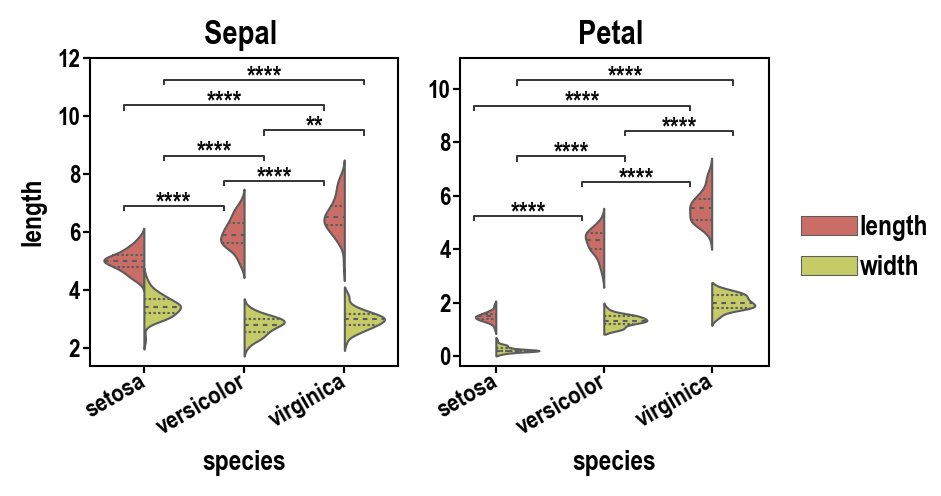

In [11]:
(
    DA3.subplots(figsize=(4, 2), sharey=False, wspace=0.2)
    .fillaxes(
        kind="violin",
        split=True,
        inner="quart",
    )
    .edit_x_ticklabels_rotate(30)
    .annotate_pairwise(
        include="__X",
    )
    .edit_legend(title="")
)
plt.savefig("iris1.png", dpi=300, bbox_inches="tight")